<a href="https://colab.research.google.com/github/rubyvanrooyen/astrokat/blob/master/notebooks/astrokat_catalogue2obsfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AstroKAT catalogue to observation file
The minimum required information for any observation is a list of observation targets specified as one target per line, using comma separated formatting to provide the relevant target information.

For more detail refer to the
[Catalogues to observation files](https://github.com/ska-sa/astrokat/wiki/Catalogues-to-observation-files)
documentation on the
[AstroKAT](https://github.com/ska-sa/astrokat/wiki)
wiki page.


## Installation and setup

In [ ]:
!pip install git+https://github.com/ska-sa/astrokat.git

In [ ]:
!git clone https://github.com/ska-sa/astrokat.git

In [2]:
!ln -s /content/astrokat/scripts/astrokat-catalogue2obsfile.py catalogue2obsfile.py

## User input
Upload CSV catalogue containing target coordinates for convertion to observation file

In [3]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
print(filename)

Saving sample_targetlist_with_cals.csv to sample_targetlist_with_cals.csv
sample_targetlist_with_cals.csv


MeerKAT instrument setup for observation

In [4]:
#@markdown observation instrument product configuration
product =  'c856M4k' #@param {type:"string"}
# add lists with values allowed -- and add standard imaging modes
# text_and_dropdown = 'value' #@param ["1st option", "2nd option", "3rd option"] {allow-input: true}

#@markdown observation band
band = 'L' #@param ["L", "UHF", "X", "S"]

#@markdown averaging time per dump [sec]
integration_period = 8.0 #@param {type:"number"}

Target observation strategy.    
Tracking a target for imaging or spectral line observations.

In [5]:
#@markdown observation start LST [HH:MM] (-1 for auto)
lst = -1 #@param {type:"number"}

#@markdown default target track duration [sec]
target_duration = 300.0 #@param {type:"number"}

#@markdown maximum duration of observation [sec] (-1 for auto)
max_duration =  35400#@param {type:"number"}

Calibrator observation strategy.   
Calibrators are identified by tags in their description strings: `bpcal`, `gaincal`, `fluxcal` and `polcal` respectively

In [6]:
#@markdown primary calibrators are 'bpcal', 'fluxcal' and 'polcal'

#@markdown minimum duration to track primary calibrators [sec].  
primary_cal_duration = 180. #@param {type:"number"}

#@markdown minimum observation interval between primary calibrators [sec]  (-1 for no cadence)
primary_cal_cadence = 1800 #@param {type:"number"}


#@markdown primary calibrators are 'gaincal' and 'delaycal'

#@markdown minimum duration to track gain calibrator [sec]
secondary_cal_duration = 65. #@param {type:"number"}

Sources are specified as a catalogue of targets, with optional timing information

In [7]:
#@markdown filename for output observation file (default only displays output)
outfile = 'sample_observation_file.yaml' #@param {type:"string"}

## Convert CSV to YAML

In [8]:
import astrokat
import catalogue2obsfile as cat2obs

In [9]:
# unpack and verify user input
instrument = {}
instrument['product'] = None if not product else product
instrument['band'] = None if not band else band
instrument['integration_period'] = integration_period

def eval_none(val_):
    if val_ < 0:
        return None
    else:
        return val_

durations = {}
max_duration = eval_none(max_duration)
durations["obs_duration"] = max_duration

lst = eval_none(lst)
primary_cal_cadence = eval_none(primary_cal_cadence)

if not outfile: outfile = None

In [10]:
# read targets from catalogue file
cat_obj = cat2obs.UnpackCatalogue(filename)
header, catalogue = cat_obj.read_catalogue(target_duration=target_duration,
                                           gaincal_duration=secondary_cal_duration,
                                           bpcal_duration=primary_cal_duration,
                                           bpcal_interval=primary_cal_cadence)

In [11]:
# create observation configuration output
obs_plan = cat2obs.BuildObservation(catalogue)
obs_plan.configure(instrument=instrument,
                   obs_duration=durations,
                   lst=lst)

{'durations': {'obs_duration': {'obs_duration': 35400}},
 'instrument': {'band': 'L', 'integration_period': 8.0, 'product': 'c856M4k'},
 'observation_loop': [{'lst': '12:30-11:30',
   'target_list': ['name=J0010-4153 | 0008-421, radec=0:10:52.52 -41:53:10.8, tags=bpcal, duration=180.0, cadence=1800, model=(145.0 20000.0 -16.9316 15.3898 -4.2105 0.3496)',
    'name=J0155-4048 | 0153-410, radec=1:55:37.06 -40:48:42.4, tags=gaincal, duration=65.0',
    'name=J0408-6545 | 0408-658, radec=4:08:20.38 -65:45:09.1, tags=bpcal fluxcal, duration=180.0, cadence=1800, model=(145.0 18000.0 -0.979 3.3662 -1.1216 0.0861)',
    'name=J1939-6342 | 1934-638, radec=19:39:25.03 -63:42:45.6, tags=bpcal fluxcal, duration=180.0, cadence=1800, model=(408.0 8640.0 -30.7667 26.4908 -7.0977 0.605334)',
    'name=NGC641_02D02, radec=1:39:25.01 -42:14:49.2, tags=target, duration=300.0',
    'name=NGC641_02D03, radec=1:40:36.77 -42:37:41.0, tags=target, duration=300.0',
    'name=NGC641_02D04, radec=1:39:25.01 -43:

In [12]:
# display observation info or write to YAML file
obs_plan.write_yaml(header=header, outfile=outfile)

In [13]:
# view yaml
!ln -s /content/astrokat/scripts/astrokat-targets.py mkatcals.py


Observation Table for 2021/4/10 14:53:27 (UTC)
Times listed in UTC for target rise and set times
Target visible when above 20.0 degrees
Sources         Class                           RA              Decl            Rise Time       Set Time        Separation      Notes           
NGC641_02D02    radec target                    1:39:25.01      -42:14:49.2     04:55:44        16:54:15        50.59           Separation from Sun
NGC641_02D03    radec target                    1:40:36.77      -42:37:41.0     04:56:01        16:56:20        51.00                           
NGC641_02D04    radec target                    1:39:25.01      -43:00:32.8     04:53:55        16:56:04        51.35                           
NGC641_03D02    radec target                    1:37:01.49      -42:14:49.2     04:53:22        16:51:52        50.54                           
NGC641_03D03    radec target                    1:38:13.25      -42:37:41.0     04:53:38        16:53:57        50.94                  

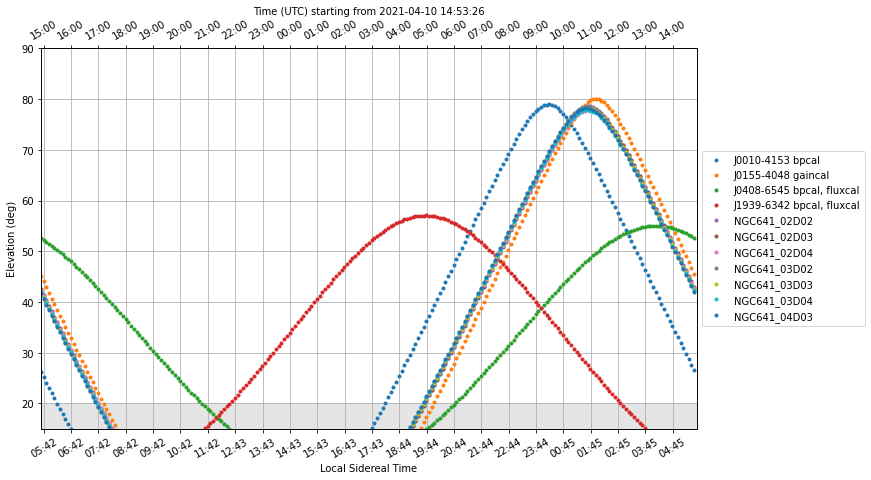

In [14]:
import mkatcals
mkatcals.main(viewfile=outfile)